In [1]:
# Importing Liaberaries 
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:

train_path = os.path.join('data' , 'C:/Users/yaten/Downloads/archive/train.csv')
df = pd.read_csv(train_path , header = None)



In [3]:


test_path = os.path.join('data' , 'C:/Users/yaten/Downloads/archive/test.csv')
df_test = pd.read_csv(test_path , header = None)



In [4]:
df_test

,0,1,2
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
...,...,...,...
399995,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399996,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399997,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399998,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [5]:
df

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [6]:
# EDA

df[0].value_counts()

2    1800000
1    1800000
Name: 0, dtype: int64

In [7]:
df_test[0].value_counts()

2    200000
1    200000
Name: 0, dtype: int64

In [8]:
df_len = len(df)

In [9]:
df_len

3600000

In [10]:
df_test_len = len(df_test)

In [11]:
df_test_len

400000

In [12]:
df['title_text'] = df[1] + ' ' + df[2]

In [13]:
df_test['title_text'] = df_test[1] + ' ' + df_test[2]

In [14]:
df.head()

,0,1,2,title_text
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...,Stuning even for the non-gamer This sound trac...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,The best soundtrack ever to anything. I'm read...
2,2,Amazing!,This soundtrack is my favorite music of all ti...,Amazing! This soundtrack is my favorite music ...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...,Excellent Soundtrack I truly like this soundtr...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine...","Remember, Pull Your Jaw Off The Floor After He..."


In [15]:
df_test.head()

,0,1,2,title_text
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...,Great CD My lovely Pat has one of the GREAT vo...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...,One of the best game music soundtracks - for a...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...,Batteries died within a year ... I bought this...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...,"works fine, but Maha Energy is better Check ou..."
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...,Great for the non-audiophile Reviewed quite a ...


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   0           int64 
 1   1           object
 2   2           object
 3   title_text  object
dtypes: int64(1), object(3)
memory usage: 109.9+ MB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   0           400000 non-null  int64 
 1   1           399990 non-null  object
 2   2           400000 non-null  object
 3   title_text  399990 non-null  object
dtypes: int64(1), object(3)
memory usage: 12.2+ MB


In [18]:
df_test.dropna(inplace = True)

In [19]:
df['label'] = df[0].apply(lambda x: 0 if x == 1 else 1)

In [20]:
df_test['label'] = df_test[0].apply(lambda x: 0 if x == 1 else 1)

In [21]:
# converting features into numpy arrays



x_train = np.array(df['title_text'] , dtype = 'str')

x_train[:3]

array(['Stuning even for the non-gamer This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^',
       "The best soundtrack ever to anything. I'm reading a lot of reviews saying that this is the best 'game soundtrack' and I figured that I'd write a review to disagree a bit. This in my opinino is Yasunori Mitsuda's ultimate masterpiece. The music is timeless and I'm been listening to it for years now and its beauty simply refuses to fade.The price tag on this is pretty staggering I must say, but if you are going to buy any cd for this much money, this is the only one that I feel would be worth every penny.",
       'Amazing! This soundtrack is my favori

In [22]:
y_train = np.array(df['label'] , dtype = 'int32')

In [23]:
x_test =  np.array(df_test['title_text'] , dtype = 'str')
y_test = np.array(df_test['label'] , dtype = 'int32')

In [24]:
y_test

array([1, 1, 0, ..., 0, 1, 0])

In [25]:
# Tokeninzing

average_len = np.mean([len(item) for item in x_train])



average_len # average length of comments 



430.6361011111111

In [26]:


max_len = int(average_len + 100)



In [27]:
tokenizer = Tokenizer(num_words = 10_000 , oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

In [28]:
train_pad = pad_sequences(train_seq , maxlen = max_len )
test_pad = pad_sequences(test_seq , maxlen = max_len )

In [29]:
train_label = to_categorical(y_train) #this if you want to one hot , but I 'm note going to use this
test_label = to_categorical(y_test)

In [30]:
y_train

array([1, 1, 1, ..., 0, 0, 1])

In [31]:
# Model Building Using LSTM



model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10_000 , 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32 , return_sequences=  True)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1028 , activation = 'tanh'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])



In [32]:


model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, None, 64)         256       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                        

In [33]:
model.compile(loss = tf.keras.losses.binary_crossentropy , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [34]:
history = model.fit(train_pad , y_train , validation_split = 0.1 , epochs = 2)

Epoch 1/2
101250/101250 [==============================] - 78752s 778ms/step - loss: 0.1517 - accuracy: 0.9428 - val_loss: 0.1276 - val_accuracy: 0.9530
Epoch 2/2
101250/101250 [==============================] - 251212s 2s/step - loss: 0.1227 - accuracy: 0.9553 - val_loss: 0.1197 - val_accuracy: 0.9564


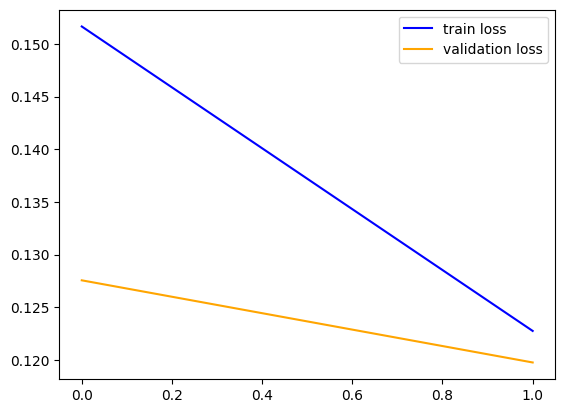

In [35]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss , 'b' , label = 'train loss')
plt.plot(val_loss , 'orange' , label = 'validation loss')

plt.legend()
plt.show()

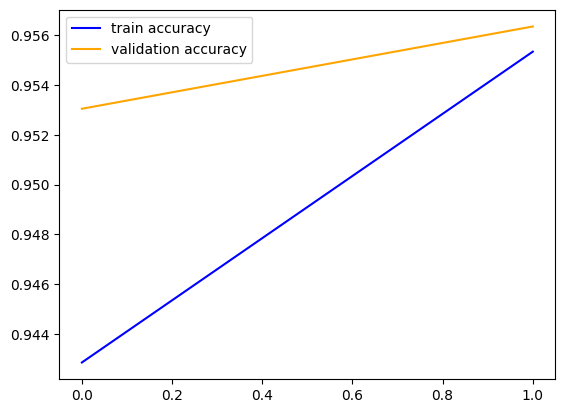

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc , 'b' , label = 'train accuracy')
plt.plot(val_acc , 'orange' , label = 'validation accuracy')

plt.legend()
plt.show()

In [37]:


model.evaluate(test_pad , y_test)



12500/12500 [==============================] - 1035s 83ms/step - loss: 0.1224 - accuracy: 0.9553


[0.12238898873329163, 0.9553014039993286]